In [67]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [68]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [71]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

for i in range(3, 19):
    fixed[model.config.par_map[f'FFKs_decorrelated[{i}]']['slice']] = [True]

for i in range(3, 8):
    fixed[model.config.par_map[f'FFK_decorrelated[{i}]']['slice']] = [True]

pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    init_pars=best_fit.tolist(),
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 0.00491165
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00491218
W MnPosDef Matrix forced pos-def by adding to diagonal 0.00497816


{'cvl': array([5.00277384, 0.02282009]),
 'cvr': array([0.95662381, 0.04846647]),
 'csl': array([1.01390824, 0.12757968]),
 'csr': array([1.01404079, 0.1319954 ]),
 'ctl': array([0.99660497, 0.00492732]),
 'FFK_decorrelated[0]': array([-0.12032181,  0.80143516]),
 'FFK_decorrelated[1]': array([-0.09228683,  0.63821456]),
 'FFK_decorrelated[2]': array([0.11328962, 0.47697114]),
 'FFK_decorrelated[3]': array([0., 0.]),
 'FFK_decorrelated[4]': array([0., 0.]),
 'FFK_decorrelated[5]': array([0., 0.]),
 'FFK_decorrelated[6]': array([0., 0.]),
 'FFK_decorrelated[7]': array([0., 0.]),
 'mu': array([1., 0.]),
 'stat': [[0.9986583930975028, 0.0023507925847049416],
  [1.0015471304727501, 0.001994760200042467],
  [1.0007490994592414, 0.0018456126073575496],
  [0.9989076653636698, 0.0018065101217148993],
  [1.0006705360382047, 0.0017939251700113679],
  [0.9989872998078422, 0.001793139094292684],
  [1.0000171534844633, 0.001821092590682527],
  [1.0003473472348985, 0.0019397357166753282],
  [1.00061

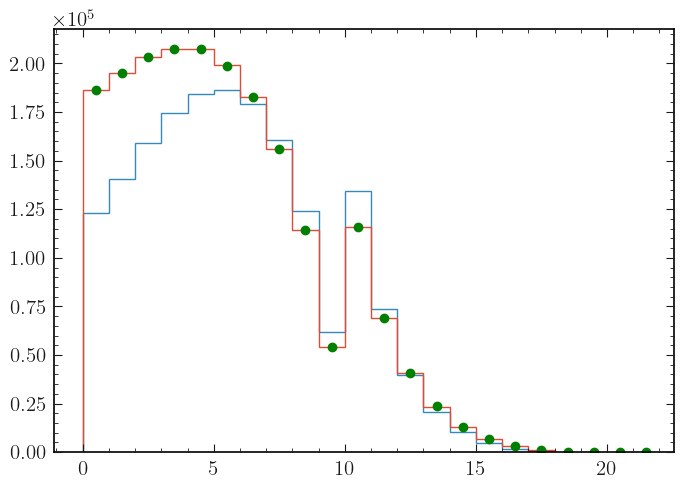

In [72]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')